http://www.emma-project.org/latest/generated/model_selection_validation.html

In [1]:
%pylab inline

from pyemma import msm
import pyemma.plots as mplt
matplotlib.rcParams.update({'font.size': 14})

import pyemma.datasets
double_well_data = pyemma.datasets.load_2well_discrete()

Populating the interactive namespace from numpy and matplotlib
You are still using msmtools from the deprecated Omnia channel. Please switch to conda-forge to catch future updates.
In order to do so please set conda-forge channel to highest priority by:

    conda config --add channels conda-forge

and update this package by:

    conda update msmtools




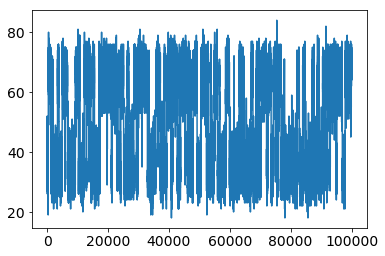

In [2]:
plot(double_well_data.dtraj_T100K_dt10)

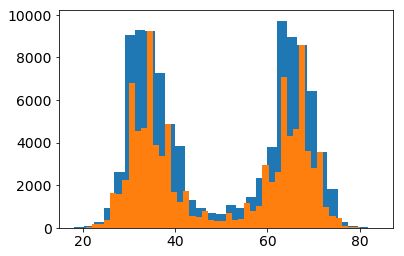

In [3]:
hist(double_well_data.dtraj_T100K_dt10,30);
hist(double_well_data.dtraj_T100K_dt10,50);

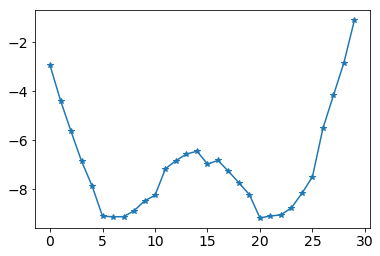

In [4]:
cnt=hist(double_well_data.dtraj_T100K_dt10,30)
plt.clf()
plot(-log(cnt[0]),'*-')

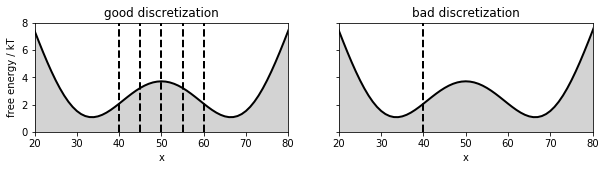

In [5]:
matplotlib.rcParams.update({'font.size': 10})
fig, axis = subplots(1, 2, figsize=(10,2))
P = double_well_data.transition_matrix
mu = msm.markov_model(P).stationary_distribution
E = -np.log(mu)
# plot 1
i = 0
axis[i].set_title('good discretization')
axis[i].plot(E-2.0, linewidth=2, color='black')
axis[i].fill_between(range(len(E)), np.zeros(len(E)), E-2.0, color='lightgrey')
axis[i].set_xlim(20,80); axis[i].set_xlabel('x'); axis[i].set_ylim(0,8); axis[i].set_ylabel('free energy / kT')
for b in [40, 45, 50, 55, 60]:
    axis[i].plot([b, b], [0, 8], linewidth=2, linestyle='dashed', color='black')
# plot 2
i = 1
axis[i].set_title('bad discretization')
axis[i].plot(E-2.0, linewidth=2, color='black')
axis[i].fill_between(range(len(E)), np.zeros(len(E)), E-2.0, color='lightgrey')
axis[i].set_xlim(20,80); axis[i].set_xlabel('x'); axis[i].set_ylim(0,8); axis[i].set_ylabel('free energy / kT')
axis[i].set_ylabel(''); axis[i].yaxis.set_ticklabels([]);
axis[i].plot([40, 40], [0, 8], linewidth=2, linestyle='dashed', color='black')
#
savefig('figs/fig_selval_ab.png', bbox_inches='tight')

In [6]:
its_good_msm = msm.timescales_msm([double_well_data.dtraj_T100K_dt10_n6good], lags = 100)
its_bad_msm = msm.timescales_msm([double_well_data.dtraj_T100K_dt10_n2bad], lags = 100)

The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.


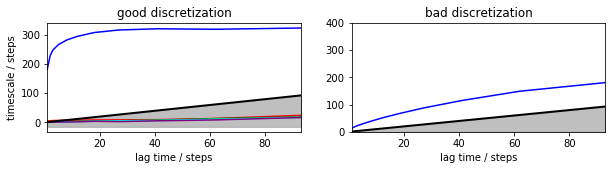

In [8]:
fig, axis = subplots(1, 2, figsize=(10,2))
mplt.plot_implied_timescales(its_good_msm, ax=axis[0], ylog=False)
ylim(0, 400); axis[0].set_title('good discretization')
mplt.plot_implied_timescales(its_bad_msm, ax=axis[1], ylog=False)
ylim(0, 400); ylabel(''); axis[1].set_title('bad discretization')
savefig('figs/its.png', bbox_inches='tight')

In [11]:
double_well_data._P

array([[ 0.41515232,  0.58484768,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22792257,  0.32108693,  0.4509905 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.22866553,  0.32117776, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.32119155,
         0.22916371,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.45015671,
         0.32117776,  0.22866553],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.41587401,  0.58412599]])

In [12]:
 pyemma.datasets.get_multi_temperature_data()

TypeError: unsupported operand type(s) for +: 'map' and 'float'